C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


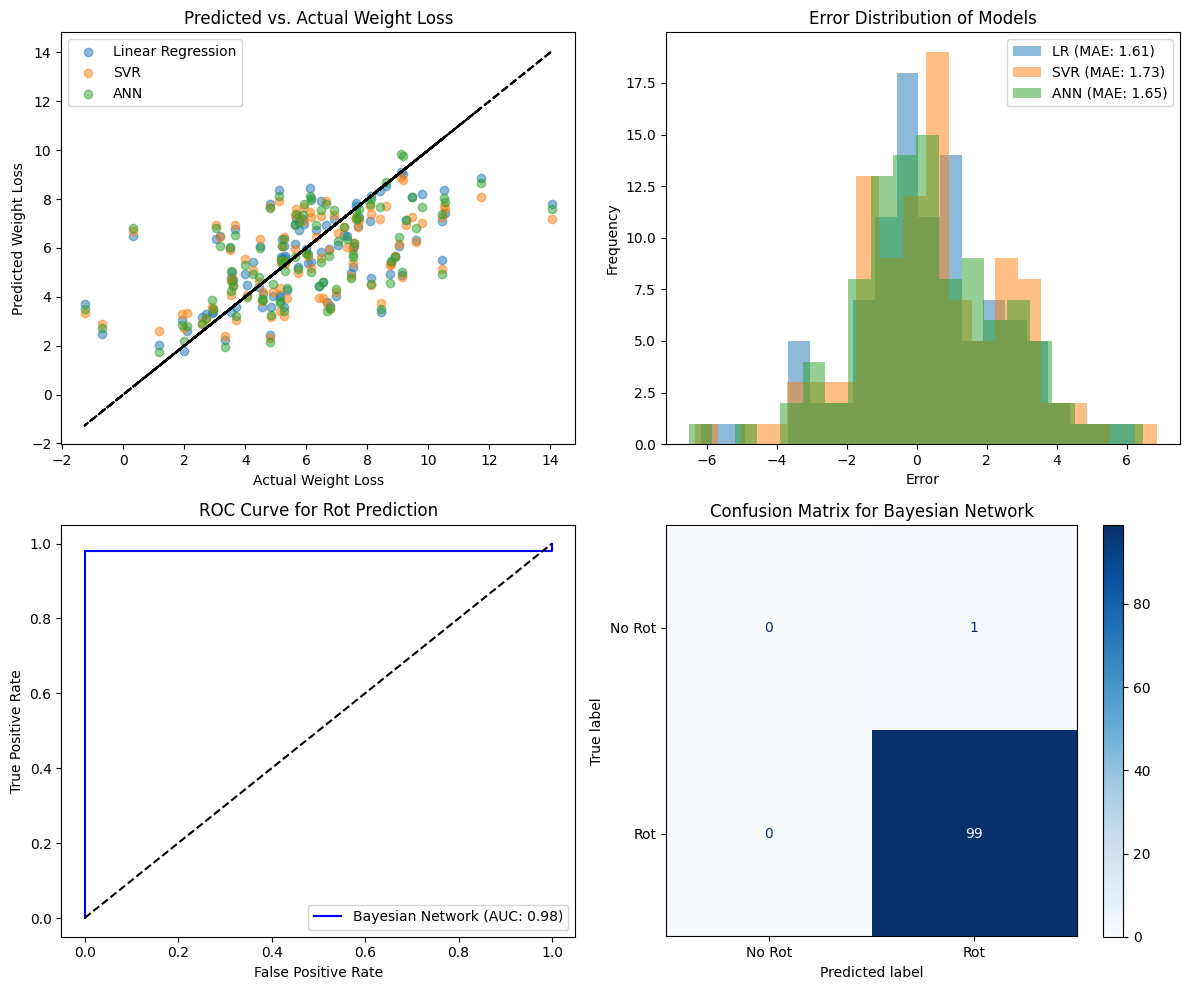

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generating synthetic dataset based on weight loss (W) and rot status (R) dependencies
np.random.seed(42)
n_samples = 500

# Features: Temperature (T), Humidity (H), Storage Duration (S)
T = np.random.uniform(5, 30, n_samples)  # Temperature in °C
H = np.random.uniform(40, 90, n_samples)  # Humidity in %
S = np.random.uniform(5, 60, n_samples)  # Storage duration in days

# Weight Loss (W) is influenced by T, H, and S
W = 0.05 * T + 0.02 * H + 0.1 * S + np.random.normal(0, 2, n_samples)  # Linear relationship with noise

# Rot Status (R) depends on T, H, S, and W
R_prob = 1 / (1 + np.exp(-0.1 * (T + H + S + W - 50)))  # Logistic function for probability
R = (R_prob > np.random.rand(n_samples)).astype(int)  # Convert to binary classification

# Creating DataFrame
df = pd.DataFrame({'T': T, 'H': H, 'S': S, 'W': W, 'R': R})

# Splitting into training and test sets
X = df[['T', 'H', 'S']]
y_W = df['W']
y_R = df['R']

X_train, X_test, y_W_train, y_W_test = train_test_split(X, y_W, test_size=0.2, random_state=42)
_, _, y_R_train, y_R_test = train_test_split(X, y_R, test_size=0.2, random_state=42)

# Standardizing features for ANN and SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training models
lr = LinearRegression().fit(X_train, y_W_train)
svr = SVR(kernel='rbf').fit(X_train_scaled, y_W_train)
ann = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42).fit(X_train_scaled, y_W_train)

# Predictions
y_W_pred_lr = lr.predict(X_test)
y_W_pred_svr = svr.predict(X_test_scaled)
y_W_pred_ann = ann.predict(X_test_scaled)

# Compute errors
mae_lr = mean_absolute_error(y_W_test, y_W_pred_lr)
mae_svr = mean_absolute_error(y_W_test, y_W_pred_svr)
mae_ann = mean_absolute_error(y_W_test, y_W_pred_ann)

# Bayesian Network (Naive Bayes as a baseline for R prediction)
nb = GaussianNB().fit(X_train, y_R_train)
y_R_pred_nb = nb.predict_proba(X_test)[:, 1]

# ROC Curve for Rot Status prediction
fpr_nb, tpr_nb, _ = roc_curve(y_R_test, y_R_pred_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Confusion Matrix
y_R_pred_class_nb = (y_R_pred_nb > 0.5).astype(int)
cm_nb = confusion_matrix(y_R_test, y_R_pred_class_nb)

# Plot results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Weight Loss Predictions vs. Actual
axes[0, 0].scatter(y_W_test, y_W_pred_lr, label='Linear Regression', alpha=0.5)
axes[0, 0].scatter(y_W_test, y_W_pred_svr, label='SVR', alpha=0.5)
axes[0, 0].scatter(y_W_test, y_W_pred_ann, label='ANN', alpha=0.5)
axes[0, 0].plot(y_W_test, y_W_test, color='black', linestyle='dashed')  # Ideal line
axes[0, 0].set_xlabel("Actual Weight Loss")
axes[0, 0].set_ylabel("Predicted Weight Loss")
axes[0, 0].set_title("Predicted vs. Actual Weight Loss")
axes[0, 0].legend()

# Error Distribution
errors_lr = y_W_test - y_W_pred_lr
errors_svr = y_W_test - y_W_pred_svr
errors_ann = y_W_test - y_W_pred_ann

axes[0, 1].hist(errors_lr, bins=20, alpha=0.5, label=f'LR (MAE: {mae_lr:.2f})')
axes[0, 1].hist(errors_svr, bins=20, alpha=0.5, label=f'SVR (MAE: {mae_svr:.2f})')
axes[0, 1].hist(errors_ann, bins=20, alpha=0.5, label=f'ANN (MAE: {mae_ann:.2f})')
axes[0, 1].set_xlabel("Error")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].set_title("Error Distribution of Models")
axes[0, 1].legend()

# ROC Curve for Bayesian Network (Naive Bayes)
axes[1, 0].plot(fpr_nb, tpr_nb, label=f'Bayesian Network (AUC: {roc_auc_nb:.2f})', color='blue')
axes[1, 0].plot([0, 1], [0, 1], linestyle='--', color='black')
axes[1, 0].set_xlabel("False Positive Rate")
axes[1, 0].set_ylabel("True Positive Rate")
axes[1, 0].set_title("ROC Curve for Rot Prediction")
axes[1, 0].legend()

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['No Rot', 'Rot'])
disp.plot(ax=axes[1, 1], cmap='Blues')
axes[1, 1].set_title("Confusion Matrix for Bayesian Network")

plt.tight_layout()
plt.show()


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


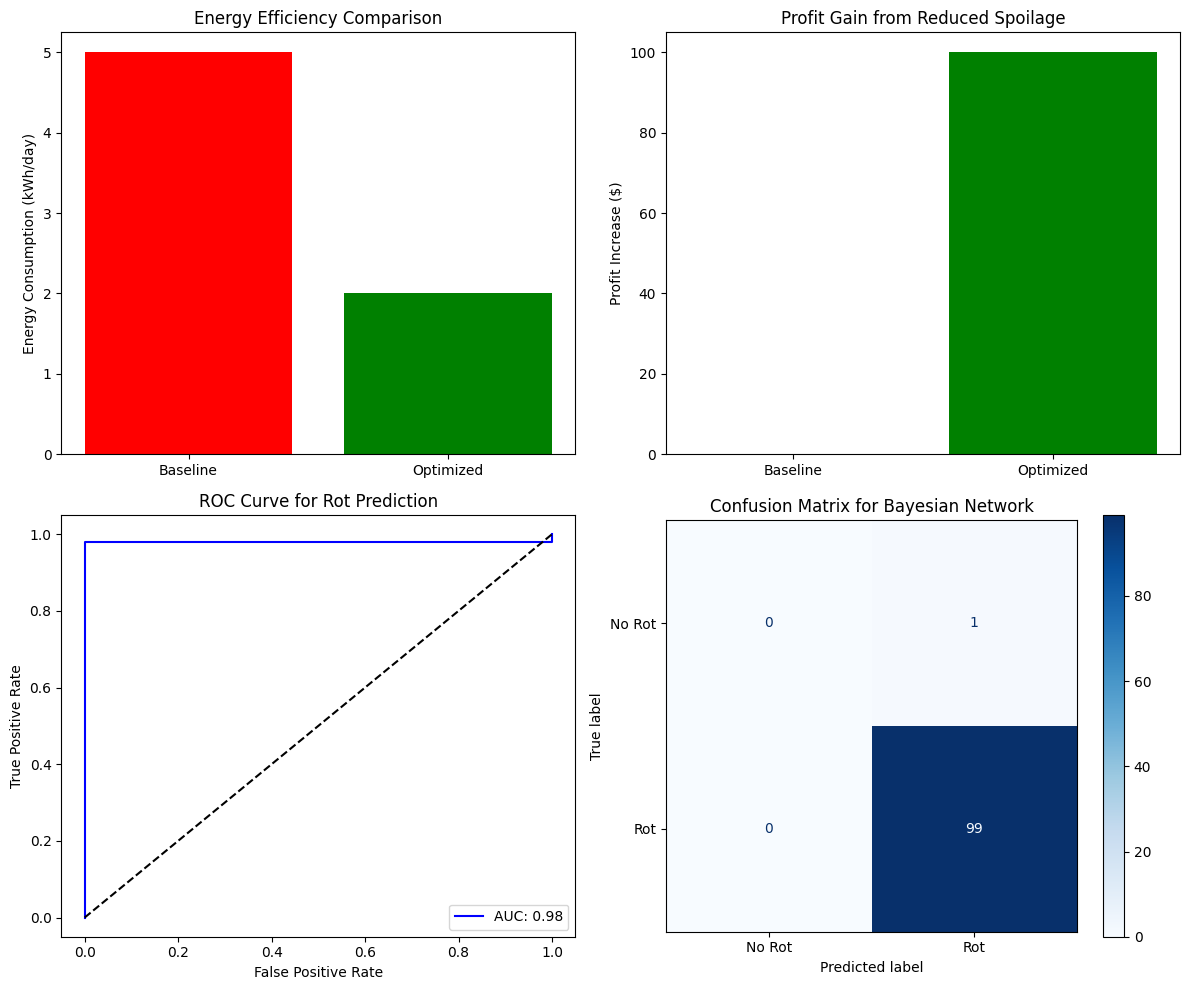

Energy Savings: 3.00 kWh/day
Profit Gain from Reduced Spoilage: $100.00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generating synthetic dataset
np.random.seed(42)
n_samples = 500
T = np.random.uniform(5, 30, n_samples)  # Temperature in °C
H = np.random.uniform(40, 90, n_samples)  # Humidity in %
S = np.random.uniform(5, 60, n_samples)  # Storage duration in days

# Weight Loss (W) influenced by T, H, and S
W = 0.05 * T + 0.02 * H + 0.1 * S + np.random.normal(0, 2, n_samples)

# Rot Status (R) depends on T, H, S, and W
R_prob = 1 / (1 + np.exp(-0.1 * (T + H + S + W - 50)))
R = (R_prob > np.random.rand(n_samples)).astype(int)

# Creating DataFrame
df = pd.DataFrame({'T': T, 'H': H, 'S': S, 'W': W, 'R': R})
X = df[['T', 'H', 'S']]
y_W = df['W']
y_R = df['R']

# Splitting data
X_train, X_test, y_W_train, y_W_test = train_test_split(X, y_W, test_size=0.2, random_state=42)
_, _, y_R_train, y_R_test = train_test_split(X, y_R, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
lr = LinearRegression().fit(X_train, y_W_train)
svr = SVR(kernel='rbf').fit(X_train_scaled, y_W_train)
ann = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42).fit(X_train_scaled, y_W_train)

# Predictions
y_W_pred_lr = lr.predict(X_test)
y_W_pred_svr = svr.predict(X_test_scaled)
y_W_pred_ann = ann.predict(X_test_scaled)

# Compute errors
mae_lr = mean_absolute_error(y_W_test, y_W_pred_lr)
mae_svr = mean_absolute_error(y_W_test, y_W_pred_svr)
mae_ann = mean_absolute_error(y_W_test, y_W_pred_ann)

# Bayesian Network for Rot Prediction
nb = GaussianNB().fit(X_train, y_R_train)
y_R_pred_nb = nb.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_R_test, y_R_pred_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Energy efficiency calculations
P_blower = 0.5  # kW
baseline_hours = 10
optimized_hours = 4
E_baseline = P_blower * baseline_hours  # kWh/day
E_optimized = P_blower * optimized_hours  # kWh/day
energy_savings = E_baseline - E_optimized

# Profit calculation
m_total = 1000  # kg
p = 2  # $/kg
S_baseline = 0.10  # 10%
S_optimized = 0.05  # 5%
m_saved = m_total * (S_baseline - S_optimized)
profit_gain = m_saved * p  # Profit from reduced spoilage

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Energy consumption bar chart
axes[0, 0].bar(['Baseline', 'Optimized'], [E_baseline, E_optimized], color=['red', 'green'])
axes[0, 0].set_ylabel("Energy Consumption (kWh/day)")
axes[0, 0].set_title("Energy Efficiency Comparison")

# Profit bar chart
axes[0, 1].bar(['Baseline', 'Optimized'], [0, profit_gain], color=['red', 'green'])
axes[0, 1].set_ylabel("Profit Increase ($)")
axes[0, 1].set_title("Profit Gain from Reduced Spoilage")

# ROC Curve
axes[1, 0].plot(fpr_nb, tpr_nb, label=f'AUC: {roc_auc_nb:.2f}', color='blue')
axes[1, 0].plot([0, 1], [0, 1], linestyle='--', color='black')
axes[1, 0].set_xlabel("False Positive Rate")
axes[1, 0].set_ylabel("True Positive Rate")
axes[1, 0].set_title("ROC Curve for Rot Prediction")
axes[1, 0].legend()

# Confusion Matrix
y_R_pred_class_nb = (y_R_pred_nb > 0.5).astype(int)
cm_nb = confusion_matrix(y_R_test, y_R_pred_class_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['No Rot', 'Rot'])
disp.plot(ax=axes[1, 1], cmap='Blues')
axes[1, 1].set_title("Confusion Matrix for Bayesian Network")

plt.tight_layout()
plt.show()

# Print energy and profit summary
print(f"Energy Savings: {energy_savings:.2f} kWh/day")
print(f"Profit Gain from Reduced Spoilage: ${profit_gain:.2f}")


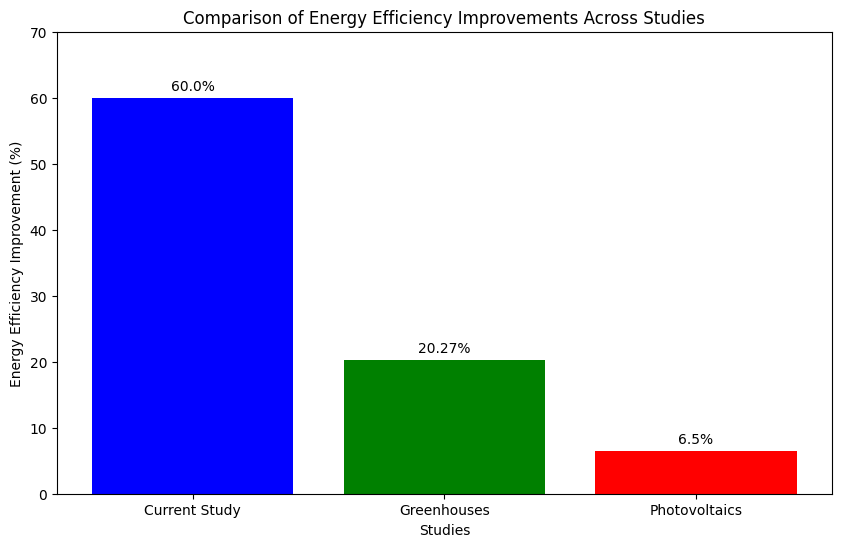

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Energy consumption parameters
P_blower = 0.5  # Power consumption of blower in kW
t_baseline = 10  # Baseline operation time in hours/day
t_optimized = 4  # Optimized operation time in hours/day
C_electricity = 0.12  # Cost of electricity in $/kWh

# Energy consumption calculations
E_baseline = P_blower * t_baseline  # Baseline energy consumption in kWh/day
E_optimized = P_blower * t_optimized  # Optimized energy consumption in kWh/day
Delta_E = E_baseline - E_optimized  # Energy savings in kWh/day
Savings_energy = Delta_E * C_electricity  # Daily energy cost savings in $

# Profit yield parameters
m_total = 1000  # Total crop mass in kg
p = 2  # Price per kg of crop in $
S_baseline = 0.10  # Spoilage percentage without optimization
S_optimized = 0.05  # Spoilage percentage with optimization

# Profit calculations
m_saved = m_total * (S_baseline - S_optimized)  # Reduction in spoilage mass in kg
Delta_Profit = m_saved * p  # Increase in profit due to reduced spoilage in $
Total_Profit = Delta_Profit + Savings_energy * 30  # Monthly total profit

# Comparative energy efficiency data from studies
studies = {
    "Current Study": 60,  # 60% energy savings
    "Greenhouses": 20.27,  # 2.27% energy savings
    "Photovoltaics": 6.5,  # 6.5% energy improvement
}

# Plotting energy efficiency comparison
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(studies.keys(), studies.values(), color=['blue', 'green', 'red'])

# Adding data labels
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_xlabel('Studies')
ax.set_ylabel('Energy Efficiency Improvement (%)')
ax.set_title('Comparison of Energy Efficiency Improvements Across Studies')
plt.ylim(0, max(studies.values()) + 10)
plt.show()
